In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

# Test peak fit

## Implemented peak functions

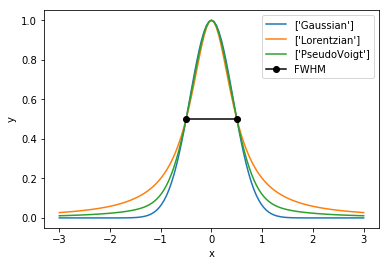

In [2]:
x = np.linspace(-3, 3, 123)

f = Gauss()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = Lorentzian()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = PseudoVoigt()
plt.plot(x, f(x, 0, 1, 1, 0.5), label=f.name);


plt.plot([-.5, .5], [.5, .5], 'o-k', label='FWHM'); # test FWHM
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Simple fit

{'function': 'Gaussian', 'x0': 0.5118165702655286, 'x0_std': 0.01919764032426884, 'fwhm': 1.0669309886475926, 'fwhm_std': 0.047420959053825144, 'amplitude': 0.9555028940163733, 'amplitude_std': 0.03555326587415687}
{'function': 'Linear', 'slope': 0.0006902393525260128, 'slope_std': 0.0027897680827435943, 'intercept': 7.0042950253252085, 'intercept_std': 0.009236314095164573}


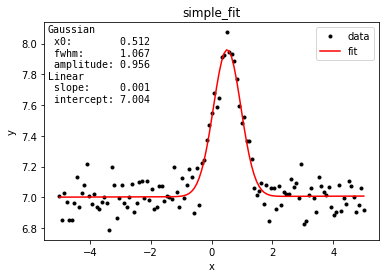

In [3]:
# Generate random data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

# _note:_ a linear slope is by default included
# set background=None to prevent this

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit,
             save_path='./example/',
             save_name='simple_fit');

## With a linear background

{'function': 'Gaussian', 'x0': 0.49912843930001627, 'x0_std': 0.021623169781739802, 'fwhm': 1.050298147511987, 'fwhm_std': 0.05336305763386704, 'amplitude': 0.981766208760511, 'amplitude_std': 0.041788362176786074}
{'function': 'Linear', 'slope': 0.09728592701402303, 'slope_std': 0.0032529660833344972, 'intercept': 7.0136658868669475, 'intercept_std': 0.01074811974501301}


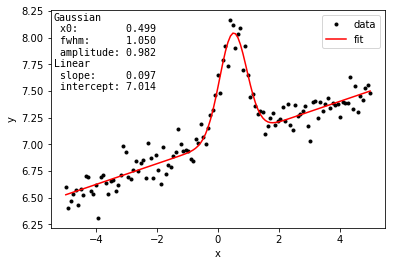

In [4]:
# Generate random data data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);

{'function': 'Gaussian', 'x0': 0.5374215110604311, 'x0_std': 0.06410456664179134, 'fwhm': 1.0976572764111254, 'fwhm_std': 0.1509547191299359, 'amplitude': 0.9896408861979163, 'amplitude_std': 0.11786081800219353}


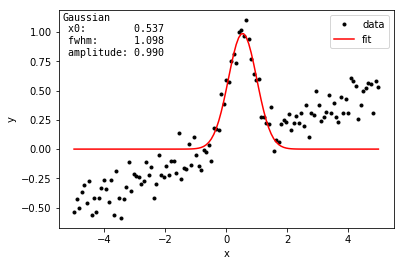

In [5]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);

## Multi-peak

{'function': 'Gaussian', 'x0': -1.5342658570922274, 'x0_std': 0.01938369604706734, 'fwhm': 1.4940701179437883, 'fwhm_std': 0.05129276877774841, 'amplitude': 1.0077303029190006, 'amplitude_std': 0.0260197815261413}
{'function': 'Gaussian', 'x0': 0.48911148847371666, 'x0_std': 0.021199879104210197, 'fwhm': 1.0831820847647569, 'fwhm_std': 0.05290493921205561, 'amplitude': 0.7985987496009366, 'amplitude_std': 0.029712063330130437}
{'function': 'Linear', 'slope': -0.0038231893464169254, 'slope_std': 0.002090543914741856, 'intercept': -0.023058286473366822, 'intercept_std': 0.008830983067596176}


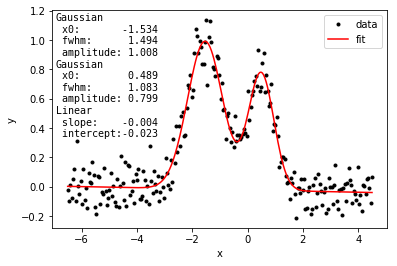

In [6]:
# Generate random data
x = np.linspace(-6.5, 4.5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plot_results(x, y, results, fit);

## Pseudo Voigt

{'function': 'PseudoVoigt', 'x0': 0.3967750860645064, 'x0_std': 0.003137110021380574, 'fwhm': 1.0089968349406078, 'fwhm_std': 0.010269330634502786, 'amplitude': 1.000651448113745, 'amplitude_std': 0.006742408843577464, 'eta': 0.40667823791617225, 'eta_std': 0.026832559976803713}


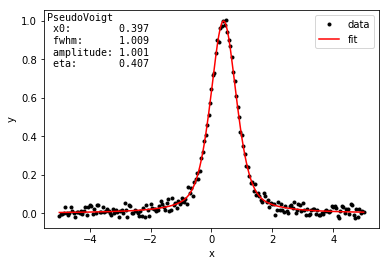

In [7]:
# Generate random data
x = np.linspace(-5, 5, 211)
y = 0.02*np.random.randn(*x.shape)
y += PseudoVoigt()(x, 0.4, 1, 1, 0.4)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, PseudoVoigt(), background=None)

for r in results:
    print(r)

# Graph
f = plot_results(x, y, results, fit, save_path='./example');